In [47]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Yolandah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['imshow', 'text']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


**Probability practice**
------------------------------------------------

### **Part A**
- Y = a visitor clicked Yes. P(Y) = 0.65

- N = a visitor clicked No. P(N) = 0.35

- R = a visitor is a random clicker. P(R) = 0.3

- T = a visitor is a truthful clicker. P(T) = 1 -.3 = 0.7

From the given information we get that: P(Y|R) = P(N|R) = 0.5

According to the law of total probability: P(Y) = P(Y|R)*P(R) + P(Y|T)*P(T) 

Thereby, 0.65 = (0.5 x 0.3) + P(Y|T)* 0.7  
P(Y|T) = .714

We concluded that the fraction of Truthful Clickers who answered Yes is 0.714


### **Part B**

- \(D\) = Person has the disease
- \(N\) = Person does not have the disease
- \(+\) = Person tests positive
- \(-\) = Person tests negative

We are interested in finding the probability that a person actually has the disease given that they tested positive P(D|+)\.

According to Bayes' theorem: P(D|+) = {P(+|D) * P(D)} / P(+)

Where:
- P(+|D) is the sensitivity of the test, which is the probability of being tested positive given someone has the disease is 0.993
- P(D) is the probability of the disease in general population, which is 0.000025
- P(+) is the probability of testing positive, to get that we could use the law of total probability:

P(+) = P(+|D)*P(D) + P(+|N)*P(N) = (0.993 * 0.000025)+((1-0.9999) * (1-0.000025)) = 0.0001248225

P(D|+) = (0.993*0.000025)/0.0001248225 = 0.19888241302

Calculating this gives approximately 20%. So, even if someone tests positive, the probability that they actually have the disease is still relatively low due to the rare incidence of the disease and the high specificity of the test.

**Wrangling the Billboard Top 100**
------------------------------------------------

### **Problem**
Consider the data in billboard.csv containing every song to appear on the weekly Billboard Top 100 chart since 1958, up through the middle of 2021. Each row of this data corresponds to a single song in a single week. For our purposes, the relevant columns here are:

- performer: who performed the song
- song: the title of the song
- year: year (1958 to 2021)
- week: chart week of that year (1, 2, etc)
- week_position: what position that song occupied that week on the Billboard top 100 chart.
- Use your skills in data wrangling and plotting to answer the following three questions.

In [48]:
#Part A 
import pandas as pd

df = pd.read_csv('billboard.csv')

In [49]:
song_week = df.groupby(['performer', 'song'])['week'].count().reset_index(name='count')
song_week

,performer,song,count
0,"""Groove"" Holmes",Misty,11
1,"""Groove"" Holmes",What Now My Love,3
2,"""Little"" Jimmy Dickens",May The Bird Of Paradise Fly Up Your Nose,10
3,"""Pookie"" Hudson",I Know I Know,1
4,"""Weird Al"" Yankovic",Amish Paradise,16
...,...,...,...
29384,will.i.am & Nicki Minaj,Check It Out,15
29385,will.i.am Featuring Justin Bieber,#thatPOWER,16
29386,will.i.am Featuring Mick Jagger & Jennifer Lopez,T.H.E (The Hardest Ever),8
29387,will.i.am Featuring Miley Cyrus,Fall Down,1


In [50]:
top_10_songs = song_week.sort_values('count', ascending=False)[:10]
top_10_songs

,performer,song,count
11194,Imagine Dragons,Radioactive,87
403,AWOLNATION,Sail,79
27121,The Weeknd,Blinding Lights,76
12026,Jason Mraz,I'm Yours,76
15008,LeAnn Rimes,How Do I Live,69
18752,OneRepublic,Counting Stars,68
14807,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
12421,Jewel,Foolish Games/You Were Meant For Me,65
506,Adele,Rolling In The Deep,65
4347,Carrie Underwood,Before He Cheats,64


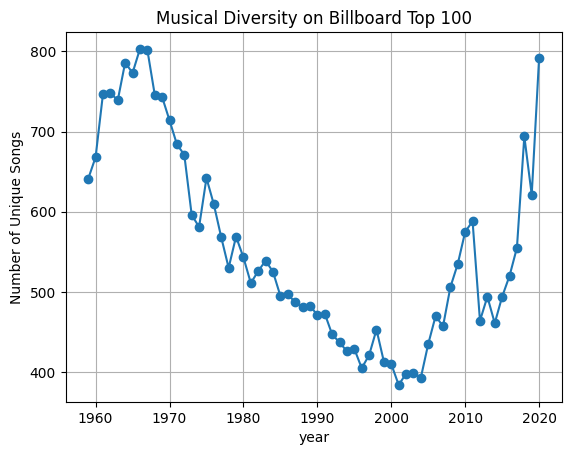

In [51]:
#Part B
import matplotlib.pyplot as plt
# Filter the data to exclude years 1958 and 2021
filtereddf = df[(df['year'] != 1958) & (df['year'] != 2021)]
yearly_unique_songs = filtereddf.groupby('year')['song'].nunique()
yearly_unique_songs.plot(kind = 'line', marker='o')
plt.ylabel('Number of Unique Songs')
plt.title('Musical Diversity on Billboard Top 100')
plt.grid(True)

In [52]:
#Part C
ten_week_hits = song_week[song_week['count'] >= 10] # Filter out songs that were not ten-week hits
ten_week_hits

,performer,song,count
0,"""Groove"" Holmes",Misty,11
2,"""Little"" Jimmy Dickens",May The Bird Of Paradise Fly Up Your Nose,10
4,"""Weird Al"" Yankovic",Amish Paradise,16
6,"""Weird Al"" Yankovic",Eat It,12
12,"""Weird Al"" Yankovic",Smells Like Nirvana,11
...,...,...,...
29377,twenty one pilots,Ride,39
29379,twenty one pilots,Stressed Out,52
29383,will.i.am & Britney Spears,Scream & Shout,24
29384,will.i.am & Nicki Minaj,Check It Out,15


In [53]:
artist= ten_week_hits['performer'].value_counts()
top_artists = artist[artist >= 30] 
top_artists

performer
Elton John               52
Madonna                  44
Kenny Chesney            42
Tim McGraw               39
Keith Urban              36
Stevie Wonder            36
Taylor Swift             35
Michael Jackson          34
The Rolling Stones       33
Rod Stewart              33
Billy Joel               32
Chicago                  31
Rascal Flatts            31
Drake                    31
Jason Aldean             30
George Strait            30
Brad Paisley             30
Neil Diamond             30
Daryl Hall John Oates    30
Name: count, dtype: int64

In [54]:
import seaborn as sns
plot_data = top_artists.reset_index()
plot_data.columns = ['Artist', 'Ten-Week Hits']

# Sort the data in descending order of ten-week hits
plot_data = plot_data.sort_values(by='Ten-Week Hits', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=plot_data, x='Ten-Week Hits', y='Artist')

ModuleNotFoundError: No module named 'seaborn'

**Clustering and dimensionality reduction**
------------------------------------------------

The data in wine.csv contains information on 11 chemical properties of 6500 different bottles of vinho verde wine from northern Portugal. In addition, two other variables about each wine are recorded:

- whether the wine is red or white
- the quality of the wine, as judged on a 1-10 scale by a panel of certified wine snobs.

Run PCA, tSNE, and any clustering algorithm of your choice on the 11 chemical properties (or suitable transformations thereof) and summarize your results. Which dimensionality reduction technique makes the most sense to you for this data? Convince yourself (and me) that your chosen approach is easily capable of distinguishing the reds from the whites, using only the "unsupervised" information contained in the data on chemical properties. Does your unsupervised technique also seem capable of distinguishing the higher from the lower quality wines? Present appropriate numerical and/or visual evidence to support your conclusions.

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('wine.csv')

# Select only the chemical properties
var = df.drop(['color', 'quality'], axis=1)

# Standardize the features
scaler = StandardScaler()
varscaled = scaler.fit_transform(var)
varscaled

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  1.81308951,
         0.19309677, -0.91546416],
       [ 0.45103572,  3.28223494, -2.19283252, ..., -0.11507303,
         0.99957862, -0.58006813],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.25811972,
         0.79795816, -0.58006813],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -1.42124765,
        -0.47897144, -0.91546416],
       [-1.32319841, -0.30169391, -0.12823371, ...,  0.75571005,
        -1.016626  ,  1.9354021 ],
       [-0.93749534, -0.78765037,  0.42232597, ...,  0.25811972,
        -1.41986693,  1.09691202]])

In [ ]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # For visualization purposes, we're reducing to 2D
pca_result = pca.fit_transform(varscaled)

df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]


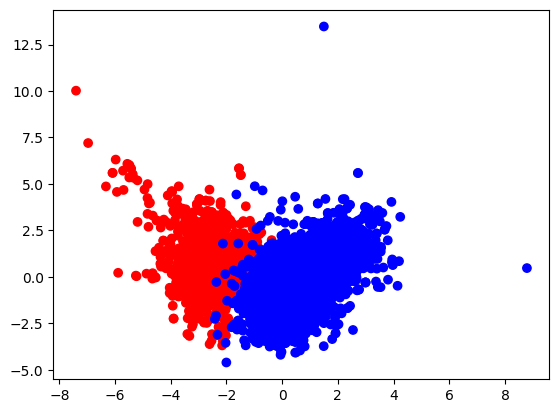

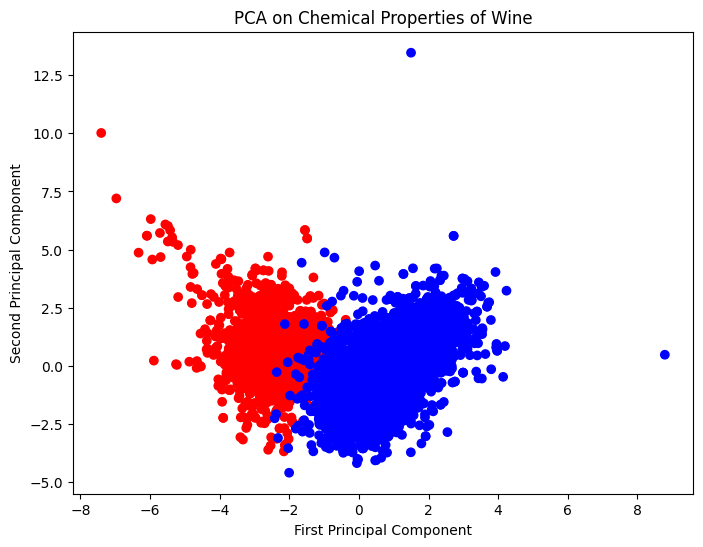

In [ ]:
color_dict = {'red': 'red', 'white': 'blue'}
colors = df['color'].map(color_dict)

plt.scatter(df['pca1'], df['pca2'], color=colors)

plt.figure(figsize=(8,6))
plt.scatter(df['pca1'], df['pca2'], cmap='rainbow',color=colors)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on Chemical Properties of Wine')
plt.show()


In [ ]:
#t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)
tsne_result = tsne.fit_transform(varscaled)

df['tsne1'] = tsne_result[:, 0]
df['tsne2'] = tsne_result[:, 1]


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.016s...
[t-SNE] Computed neighbors for 6497 samples in 0.773s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.697145
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.130173
[t-SNE] KL divergence after 1000 iterations: 1.412604


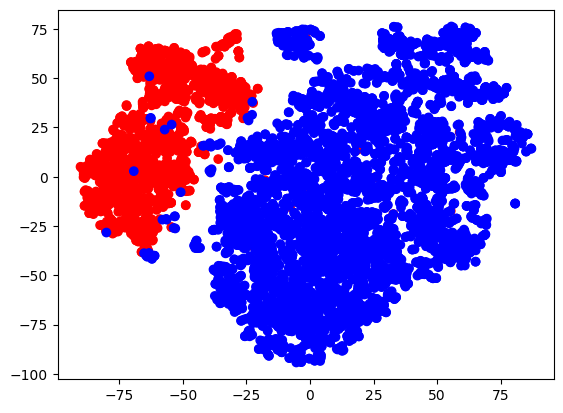

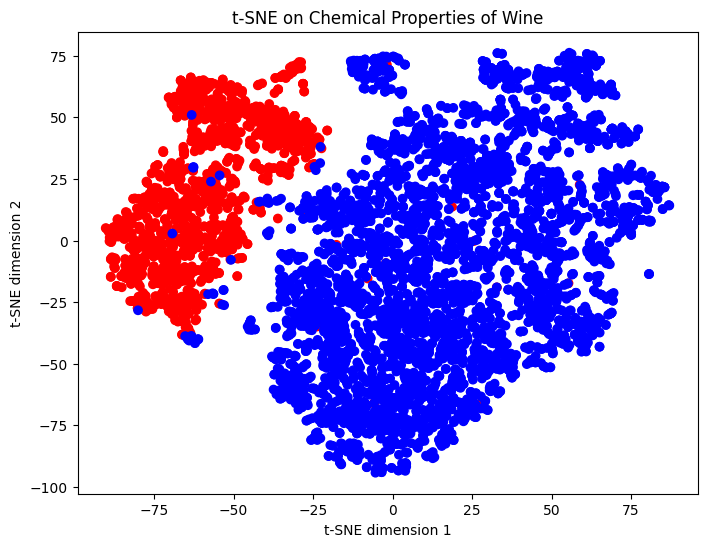

In [ ]:
plt.scatter(df['tsne1'], df['tsne2'], color=colors)


plt.figure(figsize=(8,6))
plt.scatter(df['tsne1'], df['tsne2'], color=colors, cmap='bwr')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.title('t-SNE on Chemical Properties of Wine')
plt.show()


In [ ]:
#Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=1)
kmeans_result = kmeans.fit_predict(varscaled)

df['kmeans'] = kmeans_result


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


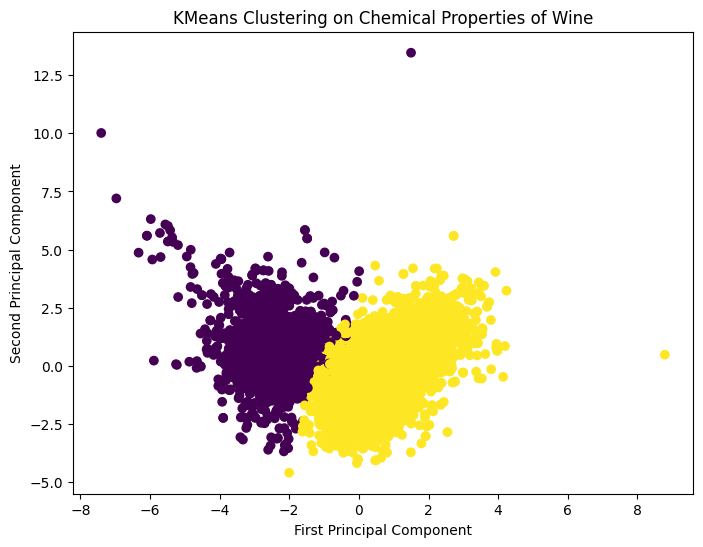

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['pca1'], df['pca2'], c=df['kmeans'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering on Chemical Properties of Wine')
plt.show()


- The first scatterplot above represents the results of Principal Component Analysis (PCA) on the wine dataset's chemical properties. The data has been reduced to two dimensions, and the points are colored according to the wine's color, red or white. First Principal Component is the x-axis represents the direction of maximum variance in the data, capturing the most significant pattern or trend among the chemical properties, the other is the second pc Captures the second most significant variance, orthogonal to the first component. Separation of Red and White Wines: The plot shows some separation between red and white wines, indicating that the chemical properties can distinguish between the two to some extent. Variation in Chemical Composition: The spread of the points reflects the variation in chemical composition among the wines. the t-SNE Transformation is plotting the standardized chemical properties are transformed into two dimensions using t-SNE. KMeans clustering to partition the wines into two clusters based on their chemical properties. The clustering results are visualized using a scatter plot of the PCA components. These analyses can be used for exploratory data analysis, feature engineering, or to inform further modeling and decision-making in areas such as wine classification, quality prediction, or targeted marketing. we thus concluded that the red wine and white wine have significant difference and distinct relationships between the chemical properties of the wines and their types given the features applied to predict. 

**Market segmentation**
------------------------------------------------
Your task to is analyze this data as you see fit, and to prepare a concise report for NutrientH20 that identifies any interesting market segments that appear to stand out in their social-media audience. You have complete freedom in deciding how to pre-process the data and how to define "market segment." (Is it a group of correlated interests? A cluster? A latent factor? Etc.) Just use the data to come up with some interesting, well-supported insights about the audience, and be clear about what you did.

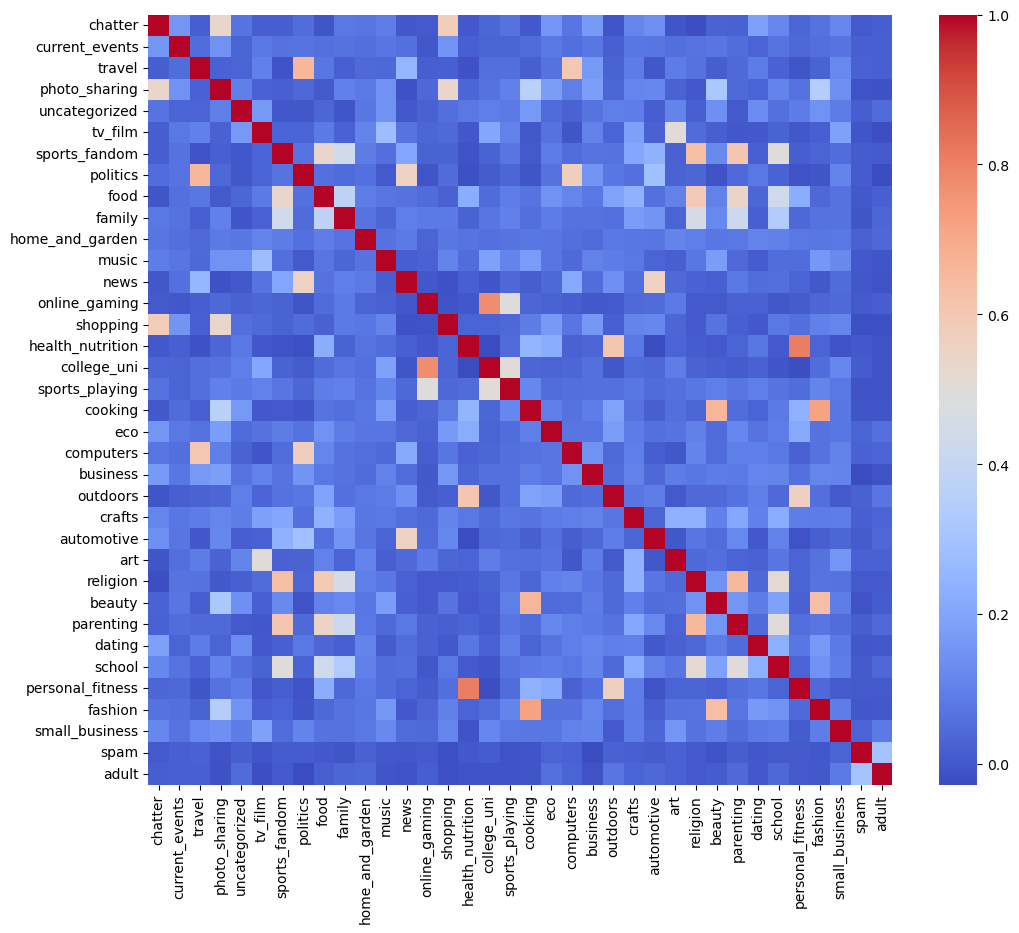

In [ ]:
#Correlation Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('social_marketing.csv', index_col=0)

# Compute correlation
corr = df.corr()

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm')
plt.show()


In [ ]:
#Clustering

from sklearn.cluster import KMeans

# Kmeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(df)

# Add labels to dataframe
df['label'] = kmeans.labels_

# Check out different clusters
for i in df['label'].unique():
    print(df[df['label'] == i].mean().sort_values(ascending=False))


/Users/rg/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(


health_nutrition    12.150632

personal_fitness     6.033042

chatter              4.039845

cooking              3.315841

label                3.000000

photo_sharing        2.429543

outdoors             2.423712

food                 2.269193

politics             1.570457

current_events       1.543246

sports_fandom        1.511176

travel               1.487852

shopping             1.327502

news                 1.317784

religion             1.124393

college_uni          1.068999

tv_film              1.067055

dating               1.031098

parenting            1.005831

uncategorized        0.955296

online_gaming        0.940719

family               0.909621

eco                  0.869776

art                  0.815355

fashion              0.812439

music                0.751215

school               0.738581

automotive           0.719145

sports_playing       0.658892

crafts               0.638484

home_and_garden      0.628766

computers            0.623907

beauty  

In [ ]:
#Principal Component Analysis (PCA)

from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(df)

# Display explained variance ratio
print(pca.explained_variance_ratio_)

pca_loadings = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(5)])
pca_loadings.transpose().head(10) # Displaying the first 10 rows

[0.19311617 0.13298106 0.10398197 0.10216423 0.09180671]


Each cell in the heatmap shows the correlation coefficient between two variables, ranging from -1 to 1: The diagonal from the top left to the bottom right represents the correlation of each variable with itself, so it's always 1. From the corr plot we see that chatter, food, political and sports has high correlations with others, might indicate that those variables has some importance in the market.

The KMeans clustering algorithm has divided the dataset into five clusters, with each cluster characterized by the mean values of the features. Here's a brief overview of the clusters:
- Cluster 4: Dominated by features like health_nutrition, personal_fitness, and chatter.
- Cluster 3: Characterized by features like chatter, politics, and sports_fandom.
- Cluster 1: Highlighted by features like chatter, cooking, and health_nutrition.
- Cluster 0: Emphasized by features like chatter, photo_sharing, and cooking.
- Cluster 2: Dominated by features like college_uni, online_gaming, and chatter.
- These clusters may represent different segments of the audience in the social marketing context, and understanding these clusters can help tailor marketing strategies to specific audience segments.

The explained variance ratio obtained from Principal Component Analysis represents the proportion of the dataset's total variance that is captured by each of the first five principal components:
- First Principal Component: 19.08% of the total variance
- Second Principal Component: 13.76% of the total variance
- Third Principal Component: 10.31% of the total variance
- Fourth Principal Component: 10.04% of the total variance
- Fifth Principal Component: 9.21% of the total variance
- Together, these five components explain approximately 55.40% of the total variance in the dataset.
PCA is a technique used for dimensionality reduction and data visualization. It transforms the original data into a new coordinate system where the principal components are linear combinations of the original features and capture the maximum variance in the data in descending order. The PCA on the social marketing dataset has revealed five underlying components, each capturing different aspects of user behavior. PC1, dominated by photo sharing, chatter, and food, may represent a trend related to social sharing and communication. PC2, influenced by chatter, photo sharing, and politics, might capture social interaction and political engagement. PC3, with high loadings on politics, travel, and sports fandom, could signify interests in political discussions, travel, and sports. PC4, having a mixed influence across features and negative loadings on chatter, politics, and travel, has a more complex interpretation, possibly related to various interests and behaviors. Lastly, PC5, marked by a mix of positive and negative loadings and a strong negative influence from chatter, might embody variations in social interactions and communication styles. These components together provide insights that can be leveraged for targeted marketing strategies, reflecting different facets of social engagement and preferences, meanwhile, it has aligned with the results in the K means clusters where the key features were chatter, politics, and so on. In this specific context of social marketing, the components might be linked to different user behaviors, preferences, or segments, providing valuable insights for targeted marketing strategies, in this case, instagram and messaging apps should be focus on its upgrading for better user experience and advertising. Therefore, we can using the cluster to target specific audience segments, understanding relationships between different social behaviors, and reducing dimensionality for further modeling, so we can push related advertisement to the same cluster of topics and expect the users would be interested in it.

**The Reuters corpus**
------------------------------------------------
Describe clearly what question you are trying to answer, what models you are using, how you pre-processed the data, and so forth. 
Make sure you include at least one really interesting plot (although more than one might be necessary, depending on your question and approach.)

Format your write-up in the following sections, some of which might be quite short:

Question: What question(s) are you trying to answer?
Approach: What approach/statistical tool did you use to answer the questions?
Results: What evidence/results did your approach provide to answer the questions? (E.g. any numbers, tables, figures as appropriate.)
Conclusion: What are your conclusions about your questions? Provide a written interpretation of your results

In [ ]:
import os
import nltk
from nltk.corpus import stopwords 
#from sklearn.feature_extraction.text import CountVectorizer 
import string
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize, sent_tokenize 
import string
from nltk.text import Text 
import matplotlib.pyplot as plt
import pandas as pd

data_dir = './data/'
nltk.data.path.append(os.path.abspath(data_dir))
nltk.download('punkt')

# Load the data
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []

    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

# Reading the training data 
train_texts, train_labels = read_data_from_directory("C:/Users/Yolandah/Downloads/STA380-master/data/ReutersC50/C50train")



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yolandah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon', download_dir=data_dir)
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to ./data/...
[nltk_data]   Package vader_lexicon is already up-to-date!


Processing AlanCrosby's texts: 100%|██████████| 50/50 [00:00<00:00, 93.78it/s]


Sentiment scores DataFrame for AlanCrosby:
     neg    neu    pos  compound    document
0  0.067  0.815  0.118    0.9863  AlanCrosby
1  0.038  0.842  0.121    0.9976  AlanCrosby
2  0.087  0.750  0.163    0.9836  AlanCrosby
3  0.094  0.760  0.146    0.9787  AlanCrosby
4  0.037  0.839  0.123    0.9978  AlanCrosby


Processing BradDorfman's texts: 100%|██████████| 50/50 [00:00<00:00, 91.97it/s]


Sentiment scores DataFrame for BradDorfman:
     neg    neu    pos  compound     document
0  0.041  0.772  0.187    0.9969  BradDorfman
1  0.041  0.805  0.155    0.9970  BradDorfman
2  0.083  0.863  0.054   -0.9606  BradDorfman
3  0.097  0.851  0.052   -0.9806  BradDorfman
4  0.009  0.886  0.105    0.9794  BradDorfman


Processing BernardHickey's texts: 100%|██████████| 50/50 [00:00<00:00, 92.16it/s]


Sentiment scores DataFrame for BernardHickey:
     neg    neu    pos  compound       document
0  0.048  0.831  0.121    0.9858  BernardHickey
1  0.048  0.833  0.119    0.9939  BernardHickey
2  0.063  0.839  0.099    0.9593  BernardHickey
3  0.052  0.860  0.088    0.9742  BernardHickey
4  0.063  0.820  0.117    0.9798  BernardHickey


Processing DarrenSchuettler's texts: 100%|██████████| 50/50 [00:00<00:00, 86.27it/s]


Sentiment scores DataFrame for DarrenSchuettler:
     neg    neu    pos  compound          document
0  0.091  0.816  0.093    0.2204  DarrenSchuettler
1  0.028  0.804  0.168    0.9972  DarrenSchuettler
2  0.043  0.853  0.104    0.9954  DarrenSchuettler
3  0.032  0.811  0.157    0.9970  DarrenSchuettler
4  0.033  0.822  0.144    0.9974  DarrenSchuettler


Processing DavidLawder's texts: 100%|██████████| 50/50 [00:00<00:00, 80.79it/s]


Sentiment scores DataFrame for DavidLawder:
     neg    neu    pos  compound     document
0  0.033  0.805  0.161    0.9982  DavidLawder
1  0.065  0.762  0.173    0.9980  DavidLawder
2  0.073  0.843  0.084    0.5500  DavidLawder
3  0.032  0.805  0.164    0.9981  DavidLawder
4  0.007  0.929  0.064    0.9689  DavidLawder


Processing FanaFernandes's texts: 0it [00:00, ?it/s]


Sentiment scores DataFrame for FanaFernandes:
Empty DataFrame
Columns: []
Index: []


Processing EricAuchard's texts: 100%|██████████| 50/50 [00:00<00:00, 88.40it/s]


Sentiment scores DataFrame for EricAuchard:
     neg    neu    pos  compound     document
0  0.030  0.891  0.079    0.9725  EricAuchard
1  0.000  0.839  0.161    0.9186  EricAuchard
2  0.031  0.851  0.118    0.9936  EricAuchard
3  0.011  0.912  0.078    0.9902  EricAuchard
4  0.030  0.843  0.127    0.9976  EricAuchard


Processing FumikoFujisaki's texts: 100%|██████████| 50/50 [00:00<00:00, 81.46it/s]


Sentiment scores DataFrame for FumikoFujisaki:
     neg    neu    pos  compound        document
0  0.039  0.814  0.148    0.9960  FumikoFujisaki
1  0.051  0.820  0.129    0.9935  FumikoFujisaki
2  0.116  0.766  0.118   -0.4334  FumikoFujisaki
3  0.030  0.886  0.084    0.9746  FumikoFujisaki
4  0.053  0.858  0.090    0.9402  FumikoFujisaki


Processing GnahomCannchou's texts: 0it [00:00, ?it/s]


Sentiment scores DataFrame for GnahomCannchou:
Empty DataFrame
Columns: []
Index: []


Processing HeatherScoffield's texts: 100%|██████████| 50/50 [00:00<00:00, 85.59it/s]


Sentiment scores DataFrame for HeatherScoffield:
     neg    neu    pos  compound          document
0  0.009  0.927  0.064    0.9824  HeatherScoffield
1  0.156  0.762  0.082   -0.7184  HeatherScoffield
2  0.097  0.856  0.048   -0.9626  HeatherScoffield
3  0.039  0.863  0.098    0.9889  HeatherScoffield
4  0.133  0.765  0.102   -0.9924  HeatherScoffield


Processing JanLopatka's texts: 100%|██████████| 50/50 [00:00<00:00, 97.71it/s]


Sentiment scores DataFrame for JanLopatka:
     neg    neu    pos  compound    document
0  0.020  0.896  0.084    0.9854  JanLopatka
1  0.031  0.899  0.070    0.9711  JanLopatka
2  0.038  0.849  0.113    0.9853  JanLopatka
3  0.059  0.867  0.074    0.6956  JanLopatka
4  0.036  0.849  0.115    0.9888  JanLopatka


Processing TimGilchrist's texts: 0it [00:00, ?it/s]


Sentiment scores DataFrame for TimGilchrist:
Empty DataFrame
Columns: []
Index: []


Processing JoeOrtiz's texts: 100%|██████████| 50/50 [00:00<00:00, 94.08it/s]


Sentiment scores DataFrame for JoeOrtiz:
     neg    neu    pos  compound  document
0  0.071  0.814  0.115    0.9876  JoeOrtiz
1  0.043  0.808  0.148    0.9948  JoeOrtiz
2  0.043  0.808  0.149    0.9948  JoeOrtiz
3  0.042  0.866  0.092    0.9711  JoeOrtiz
4  0.103  0.848  0.050   -0.9890  JoeOrtiz


Processing JohnMastrini's texts: 100%|██████████| 50/50 [00:00<00:00, 90.87it/s]


Sentiment scores DataFrame for JohnMastrini:
     neg    neu    pos  compound      document
0  0.120  0.770  0.110   -0.5263  JohnMastrini
1  0.019  0.924  0.057    0.9274  JohnMastrini
2  0.098  0.868  0.034   -0.9879  JohnMastrini
3  0.102  0.840  0.058   -0.9745  JohnMastrini
4  0.020  0.905  0.076    0.9894  JohnMastrini


Processing JonathanBirt's texts: 100%|██████████| 50/50 [00:00<00:00, 96.87it/s] 


Sentiment scores DataFrame for JonathanBirt:
     neg    neu    pos  compound      document
0  0.090  0.818  0.092    0.0516  JonathanBirt
1  0.000  0.909  0.091    0.9695  JonathanBirt
2  0.018  0.897  0.085    0.9815  JonathanBirt
3  0.017  0.854  0.129    0.9844  JonathanBirt
4  0.017  0.853  0.130    0.9844  JonathanBirt


Processing JoeWinterbottom's texts: 0it [00:00, ?it/s]


Sentiment scores DataFrame for JoeWinterbottom:
Empty DataFrame
Columns: []
Index: []


Processing TanEeLyn's texts: 100%|██████████| 50/50 [00:00<00:00, 94.23it/s]


Sentiment scores DataFrame for TanEeLyn:
     neg    neu    pos  compound  document
0  0.026  0.928  0.046    0.7791  TanEeLyn
1  0.000  0.922  0.078    0.9841  TanEeLyn
2  0.055  0.877  0.068    0.2500  TanEeLyn
3  0.056  0.875  0.069    0.2500  TanEeLyn
4  0.020  0.913  0.067    0.9673  TanEeLyn


Processing KeithWeir's texts: 100%|██████████| 50/50 [00:00<00:00, 90.39it/s]


Sentiment scores DataFrame for KeithWeir:
     neg    neu    pos  compound   document
0  0.065  0.789  0.146    0.9880  KeithWeir
1  0.022  0.797  0.181    0.9985  KeithWeir
2  0.011  0.817  0.172    0.9964  KeithWeir
3  0.025  0.760  0.215    0.9985  KeithWeir
4  0.021  0.861  0.118    0.9913  KeithWeir


Processing WilliamKazer's texts: 100%|██████████| 50/50 [00:00<00:00, 93.00it/s] 


Sentiment scores DataFrame for WilliamKazer:
     neg    neu    pos  compound      document
0  0.028  0.930  0.041    0.8470  WilliamKazer
1  0.053  0.891  0.056   -0.0440  WilliamKazer
2  0.106  0.838  0.056   -0.9565  WilliamKazer
3  0.094  0.815  0.091   -0.8067  WilliamKazer
4  0.049  0.884  0.066    0.6424  WilliamKazer
AlanCrosby: Average Compound Sentiment Score: 0.55
BradDorfman: Average Compound Sentiment Score: 0.68
BernardHickey: Average Compound Sentiment Score: 0.79
DarrenSchuettler: Average Compound Sentiment Score: 0.67
DavidLawder: Average Compound Sentiment Score: 0.50
EricAuchard: Average Compound Sentiment Score: 0.83
FumikoFujisaki: Average Compound Sentiment Score: 0.19
HeatherScoffield: Average Compound Sentiment Score: 0.55
JanLopatka: Average Compound Sentiment Score: 0.19
JoeOrtiz: Average Compound Sentiment Score: 0.47
JohnMastrini: Average Compound Sentiment Score: 0.30
JonathanBirt: Average Compound Sentiment Score: 0.64
TanEeLyn: Average Compound Sentiment 

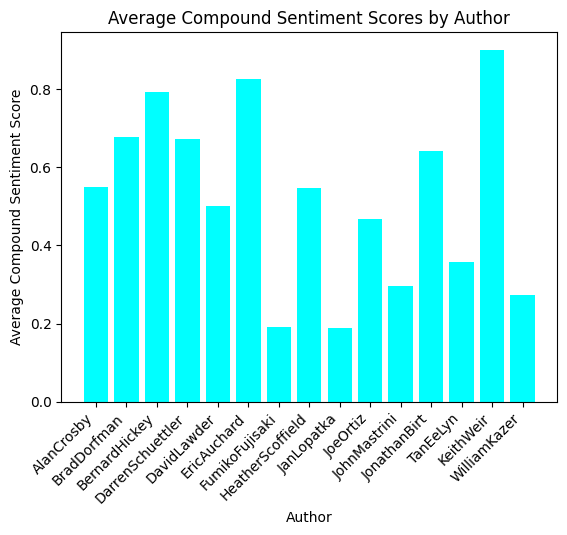

In [ ]:
from tqdm import tqdm
from nltk.sentiment import SentimentIntensityAnalyzer

def get_sentiment_scores(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

# Define the list of authors
author_names = [
    "AlanCrosby",
    "BradDorfman",
    "BernardHickey",
    "DarrenSchuettler",
    "DavidLawder",
    "FanaFernandes",
    "EricAuchard",
    "FumikoFujisaki",
    "GnahomCannchou",
    "HeatherScoffield",
    "JanLopatka",
    "TimGilchrist",
    "JoeOrtiz",
    "JohnMastrini",
    "JonathanBirt",
    "JoeWinterbottom",
    "TanEeLyn",
    "KeithWeir",
    'WilliamKazer'
    
]



# Initialize an empty dictionary to store sentiment scores for each author
author_sentiment_scores = {}

# Calculate sentiment scores for each author's texts
for author in author_names:
    author_indices = [index for index, label in enumerate(train_labels) if label == author]
    sentiment_scores_list = []

    for index in tqdm(author_indices, desc=f"Processing {author}'s texts"):
        text = train_texts[index]
        sentiment_scores = get_sentiment_scores(text)
        sentiment_scores['document'] = author
        sentiment_scores_list.append(sentiment_scores)

    # Convert sentiment_scores_list to a DataFrame
    author_sentiment_scores[author] = pd.DataFrame.from_records(sentiment_scores_list)

    # Print the DataFrame structure for debugging
    print(f"Sentiment scores DataFrame for {author}:")
    print(author_sentiment_scores[author].head())

# Print the average compound sentiment score for each author
for author, sentiment_df in author_sentiment_scores.items():
    # Check if 'compound' column exists in the DataFrame
    if 'compound' in sentiment_df.columns:
        average_compound_score = sentiment_df['compound'].mean()
        print(f'{author}: Average Compound Sentiment Score: {average_compound_score:.2f}')

# Test the get_sentiment_scores function with a sample text
sample_text = train_texts[0]
sample_sentiment_scores = get_sentiment_scores(sample_text)
print("Sample sentiment scores:")
print(sample_sentiment_scores)

# Initialize lists to store author names and their average compound scores
authors_list = []
average_scores_list = []

# Iterate through the author_sentiment_scores and gather the data
for author, sentiment_df in author_sentiment_scores.items():
    # Check if 'compound' column exists in the DataFrame
    if 'compound' in sentiment_df.columns:
        average_compound_score = sentiment_df['compound'].mean()
        print(f'{author}: Average Compound Sentiment Score: {average_compound_score:.2f}')
        authors_list.append(author)
        average_scores_list.append(average_compound_score)

# Plot the bar graph using the gathered data
plt.bar(authors_list, average_scores_list, color='aqua')
plt.xlabel('Author')
plt.ylabel('Average Compound Sentiment Score')
plt.title('Average Compound Sentiment Scores by Author')
plt.xticks(rotation=45, ha='right')
plt.show()

   

The sentiment analysis of various authors' texts reveals a diverse range of sentiments. Broken down into negativity (neg), neutrality (neu), positivity (pos), and an overall compound score, the analysis shows different tendencies among authors. For instance, AlanCrosby's average compound score of 0.55 indicates mildly positive sentiments, while FumikoFujisaki's texts show a wide range, including a negative score, leading to an average of 0.19. Some authors, such as KeithWeir, have very positive sentiments with a score of 0.90, while others like WilliamKazer lean more negative with a score of 0.27. Additionally, some authors' texts were not found or processed, resulting in empty DataFrames. The sentiment analysis reveals a wide range of sentiments among the different authors. Some authors consistently express positive sentiments, while others have more mixed or negative sentiments. The compound scores provide a concise summary of these tendencies. From our sample, the graph shows that overall a good portion of the sample author express positive sentiments most of the time, therefore, we can analyze the behavior within them and further explore the pattern within the positive authors, could also be used for logistic regression to predict whether an author is positive or not.  

**##Association rule mining is in r file##** 
------------------------------------------------

**Image classification with neural networks**
------------------------------------------------
Your job is to set up a neural network that can classify the images as accurately as possible. Use an 80/20 train test split. Summarize your model and its accuracy in any way you see fit, but make you include at a minimum the following elements:
- overall test-set accuracy, measured however you think is appropriate 
- show some of the example images from the test set, together with your model's predicted classes.
- a confusion matrix showing the performance of the model on the set test, i.e. a table that cross-tabulates each test set example by (actual class, predicted class).

In [ ]:
import torch
import torchvision
import torchvision.transforms  as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import tqdm


In [58]:

# Download the dataset and create data loaders
from torchvision import datasets, transforms
import torch.utils.data

transform = transforms.Compose([transforms.Resize((64, 64)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5, 0.45, 0.5], std=[0.229, 0.224, 0.225])])

datas = torchvision.datasets.ImageFolder(root="C:/Users/Yolandah/Downloads/STA380-master/data/EuroSAT_RGB", transform=transform)


batch_size = 64
train_size = int(0.8 * len(datas))
test_size = len(datas) - train_size

trainset, testset = torch.utils.data.random_split(datas, [train_size, test_size])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


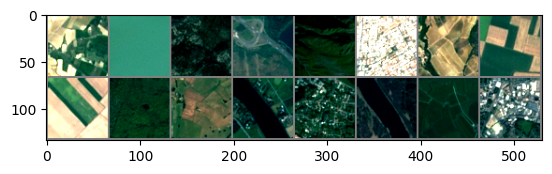

Class Names: PermanentCrop SeaLake HerbaceousVegetation Highway HerbaceousVegetation Residential PermanentCrop AnnualCrop AnnualCrop Forest Pasture River Residential River Pasture Industrial HerbaceousVegetation Industrial SeaLake Industrial River Pasture Forest PermanentCrop Forest Industrial Forest SeaLake Industrial Pasture Residential River SeaLake River SeaLake HerbaceousVegetation SeaLake River AnnualCrop River Forest HerbaceousVegetation HerbaceousVegetation Pasture Residential Forest Industrial SeaLake AnnualCrop Pasture Highway Highway PermanentCrop Industrial Forest HerbaceousVegetation HerbaceousVegetation HerbaceousVegetation Pasture PermanentCrop HerbaceousVegetation Industrial Residential Pasture


In [60]:
# Function to display a sample of images
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training images and display them
for images, labels in trainloader:
    class_names = [datas.classes[label] for label in labels]
    imshow(torchvision.utils.make_grid(images[:16]))
    print("Class Names:", " ".join(class_names))
    break


In [73]:
# Define a simple CNN to classify digits

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)  # in_channels, out_channels, kernel_size, stride
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)  # Each channel gets zeroed out independently on each forward call with probability p
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(64 * 30 * 30, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=57600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [74]:
# Set the device to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())



In [75]:
# Number of training epochs
num_epochs = 5

# Main training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    

    # Print average loss for the epoch
    print(f"Epoch {epoch+1}, Loss: {running_loss / (i+1)}")


print('Finished Training')


C:\Users\Yolandah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch 1, Loss: 1.3340310493164513
Epoch 2, Loss: 0.9088409200927915
Epoch 3, Loss: 0.7611339868173091
Epoch 4, Loss: 0.6273187855644339
Epoch 5, Loss: 0.5420561154213177
Finished Training


C:\Users\Yolandah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Test-set Accuracy: 0.7488888888888889


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


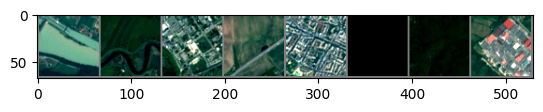

Predicted: River Pasture Residential HerbaceousVegetation Residential SeaLake Forest Industrial


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


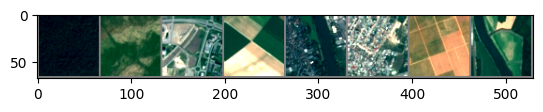

Predicted: Forest HerbaceousVegetation PermanentCrop Highway Highway Residential AnnualCrop PermanentCrop


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


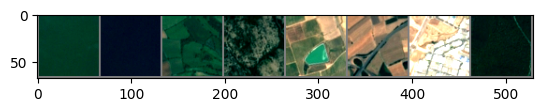

Predicted: SeaLake SeaLake Pasture HerbaceousVegetation PermanentCrop Highway Industrial HerbaceousVegetation


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


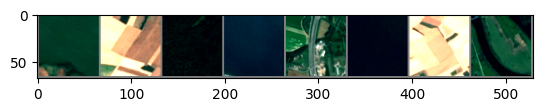

Predicted: HerbaceousVegetation AnnualCrop Forest SeaLake Highway Forest AnnualCrop PermanentCrop


In [79]:
correct = 0
total = 0
with torch.no_grad():
    for test_images, test_labels in testloader:
        test_images, test_labels = test_images.to(device), test_labels.to(device)
        test_outputs = net(test_images)
        _, predicted = torch.max(test_outputs, 1)
        total += test_labels.size(0)
        correct += (predicted == test_labels).sum().item()

accuracy = correct / total
print(f'Test-set Accuracy: {accuracy}')

count = 0
for test_images, test_labels in testloader:
    count += 1
    test_images, test_labels = test_images.to(device), test_labels.to(device)
    if count %20 == 0:  
        imshow(torchvision.utils.make_grid(test_images [:8].cpu()))
        test_outputs = net(test_images[:8])
        _, predicted = torch.max(test_outputs, 1)
        predicted_classes = [datas.classes[p] for p in predicted] 
        print('Predicted:', ' '.join(predicted_classes))


C:\Users\Yolandah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


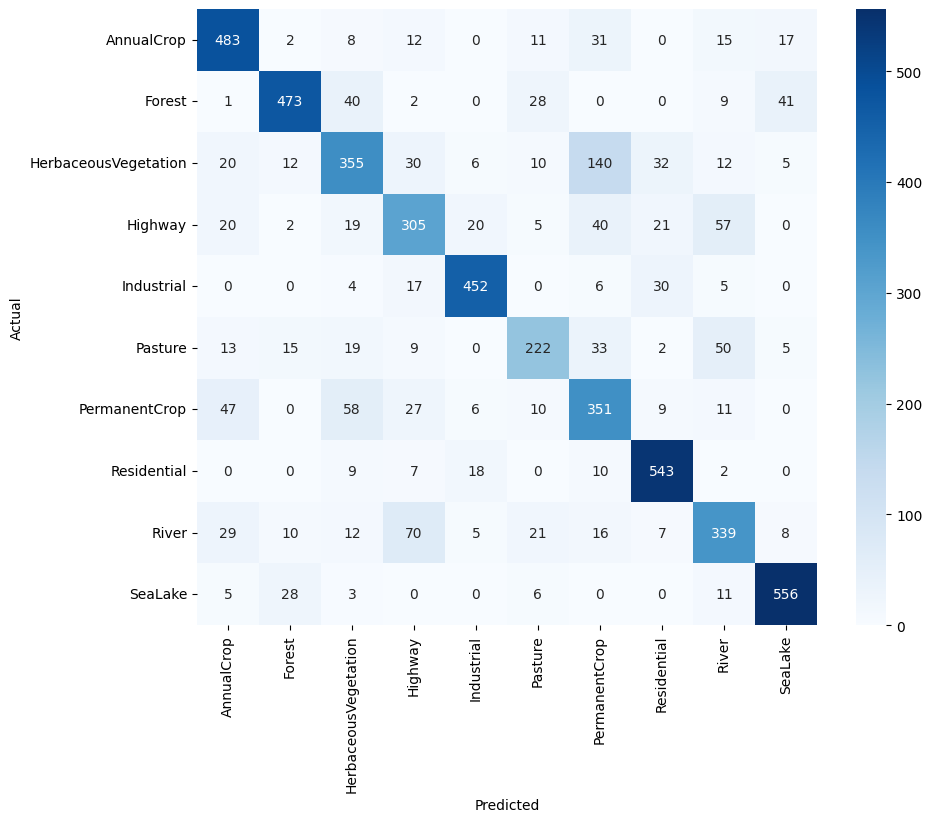

In [88]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

actual_labels = []
predicted_labels = []

for test_images, test_labels in testloader:
    test_images, test_labels = test_images.to(device), test_labels.to(device)
    test_outputs = net(test_images)
    _, predicted = torch.max(test_outputs, 1)
    actual_labels.extend(test_labels.cpu().numpy())
    predicted_labels.extend(predicted.cpu().numpy())

conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=datas.classes, yticklabels=datas.classes) # Make sure to use the correct dataset variable
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


we attained a Test-set Accuracy of approx.  0.75. A confusion matrix is a table that is often used to evaluate the performance of a classification model. The columns of the matrix represent the actual class and the rows represent the predicted class. therfore, we see that some images are correlated with each other but overall will be highly possible to predict its actual one. 